In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web


In [2]:
import yfinance as yf

assets = ['AAPL', 'MSFT', 'GOOGL']
start_date = '2020-01-01'
end_date = '2024-01-01'

# Fetch data from Yahoo Finance
data = yf.download(assets, start=start_date, end=end_date)['Adj Close']



[*********************100%%**********************]  3 of 3 completed


In [3]:
returns = data.pct_change()


In [4]:
mean_returns = returns.mean()
cov_matrix = returns.cov()


In [5]:
def portfolio_variance(weights, mean_returns, cov_matrix):
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_std_dev


In [6]:
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})


In [7]:
bounds = tuple((0, 1) for _ in range(len(assets)))


In [8]:
from scipy.optimize import minimize

# Initial guess for weights
init_guess = [1/len(assets) for _ in range(len(assets))]

# Perform optimization
result = minimize(portfolio_variance, init_guess, args=(mean_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)


In [9]:
optimal_weights = result.x


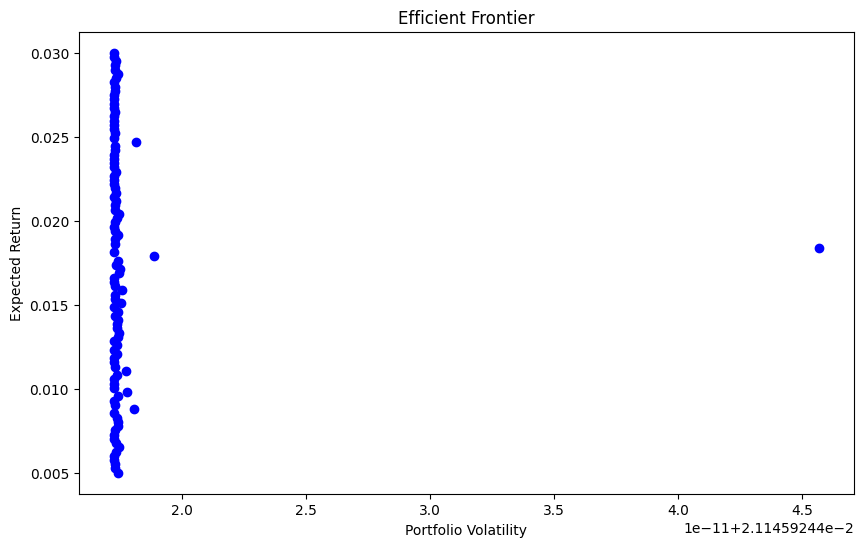

Optimal Portfolio Weights:
AAPL: 0.3333
MSFT: 0.3333
GOOGL: 0.3333


In [10]:
# Calculate efficient frontier
returns_range = np.linspace(0.005, 0.03, 100)
variances = []

for ret in returns_range:
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}, 
                   {'type': 'eq', 'fun': lambda x: np.sum(mean_returns * x) - ret})
    result = minimize(portfolio_variance, init_guess, args=(mean_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)
    variances.append(result.fun)

# Plot efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(variances, returns_range, marker='o', color='blue')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Expected Return')
plt.show()

# Print optimal weights
print("Optimal Portfolio Weights:")
for asset, weight in zip(assets, optimal_weights):
    print(f"{asset}: {weight:.4f}")
